# Gravitational tensor produced by a prism

This code illustrates how to compute the gravitational tensor and its invariants (Pedersen and Rasmussen, 1991) produced by a homogeneous rectangular prism.

* Pedersen, L. B. e Rasmussen, T. M. The gradient tensor of potential field anomalies: Some implications on data collection and data processing of maps. GEOPHYSICS, 55(12), 1558-1566, 1990, doi: [10.1190/1.1442807](http://dx.doi.org/10.1190/1.1442807)

### Things we have to import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gravmag.models import rectangular_prism as rp
from gravmag import plot_functions as plf

### Model

In [2]:
# Create a model formed three prisms
# model = np.array([[  2000.,  3000.,  -2500., -1500., 10., 1010.], 
#                   [-10000., 10000.,   1500.,  2500., 10., 1010.],
#                   [ -3000., -2000., -10000.,  1500., 10., 1010.]])
model = {
    "x1": np.array([  2000, -10000,  -3000]),
    "x2": np.array([  3000,  10000,  -2000]),
    "y1": np.array([ -2500,   1500, -10000]),
    "y2": np.array([ -1500,   2500,   1500]),
    "z1": np.array([    10,     10,     10]),
    "z2": np.array([  1010,   1010,   1010]),
}

density = np.array([2000, 2000, 2000]) # 2000 kg/m³ = 2 g/cm³

### Points were we compute the synthetic data

In [3]:
# number of points along x and y
shape = (100, 100)

# minimum x, maximum x, minimum y and maximum y
area = [-5000, 5000, -4000, 6000]

# coordinates 
xp = np.linspace(area[0], area[1], shape[0])
yp = np.linspace(area[2], area[3], shape[1])
# create an y-oriented grid
xp, yp = np.meshgrid(xp, yp, indexing='ij')

xp = np.ravel(xp)
yp = np.ravel(yp)
zp = np.zeros_like(yp) - 150

coordinates = {
    'x' : xp,
    'y' : yp,
    'z' : zp,
}

### Synthetic data

In [4]:
# Compute the vertical component of acceleration
gz = rp.grav(coordinates=coordinates, prisms=model, density=density, field='z')

# Compute the second derivatives
gxx = rp.grav(coordinates=coordinates, prisms=model, density=density, field='xx')
gxy = rp.grav(coordinates=coordinates, prisms=model, density=density, field='xy')
gxz = rp.grav(coordinates=coordinates, prisms=model, density=density, field='xz')
gyy = rp.grav(coordinates=coordinates, prisms=model, density=density, field='yy')
gyz = rp.grav(coordinates=coordinates, prisms=model, density=density, field='yz')
gzz = rp.grav(coordinates=coordinates, prisms=model, density=density, field='zz')

### Plot the data

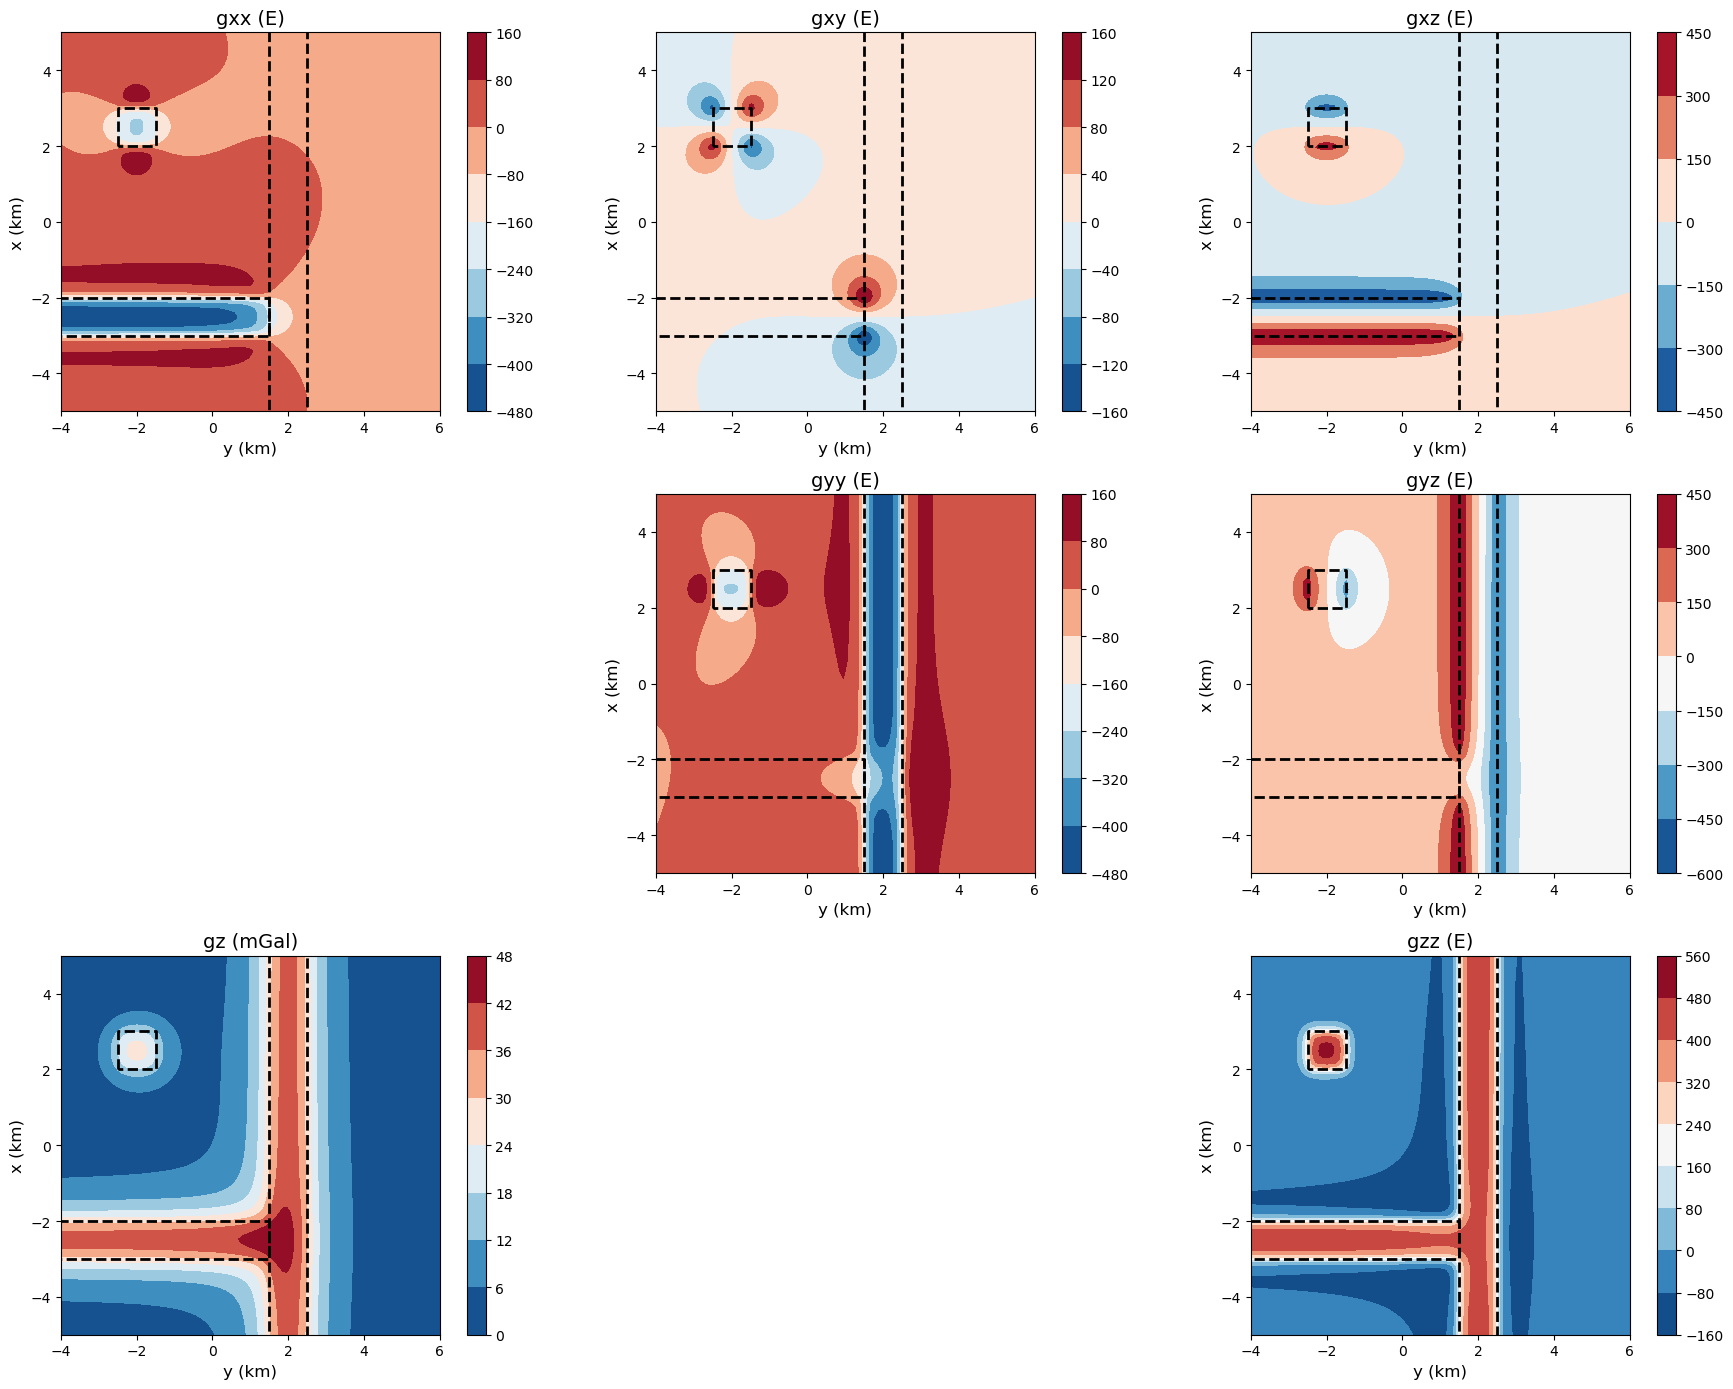

In [5]:
fields = [gxx, gxy, gxz, gyy, gyz, gzz, gz]
windows = [1, 2, 3, 5, 6, 9, 7]
titles = ['gxx (E)', 'gxy (E)', 'gxz (E)', 'gyy (E)', 'gyz (E)', 'gzz (E)', 'gz (mGal)']

plt.figure(figsize=(18,14))

for w, window in enumerate(windows):

    plt.subplot(3,3,window)
    plt.title(titles[w], fontsize=14)
    plt.axis('scaled')
    plt.contourf(coordinates['y'].reshape(shape)*0.001, 
                 coordinates['x'].reshape(shape)*0.001, 
                 fields[w].reshape(shape), cmap='RdBu_r')
    plt.colorbar()
    plf.model_boundaries(model, m2km=True)
    plt.ylim(0.001*area[0], 0.001*area[1])
    plt.xlim(0.001*area[2], 0.001*area[3])
    plt.ylabel('x (km)', fontsize=12)
    plt.xlabel('y (km)', fontsize=12)

plt.tight_layout()

plt.show()

### Compute tensor invariants

In [6]:
I0 = gxx + gyy + gzz
I1 = gxx*gyy + gyy*gzz + gxx*gzz - gxy**2 - gyz**2 - gxz**2
I2 = gxx*(gyy*gzz - gyz**2) + gxy*(gyz*gxz - gxy*gzz) + gxz*(gxy*gyz - gxz*gyy)
I = -((I2/2.)**2)/((I1/3.)**3)

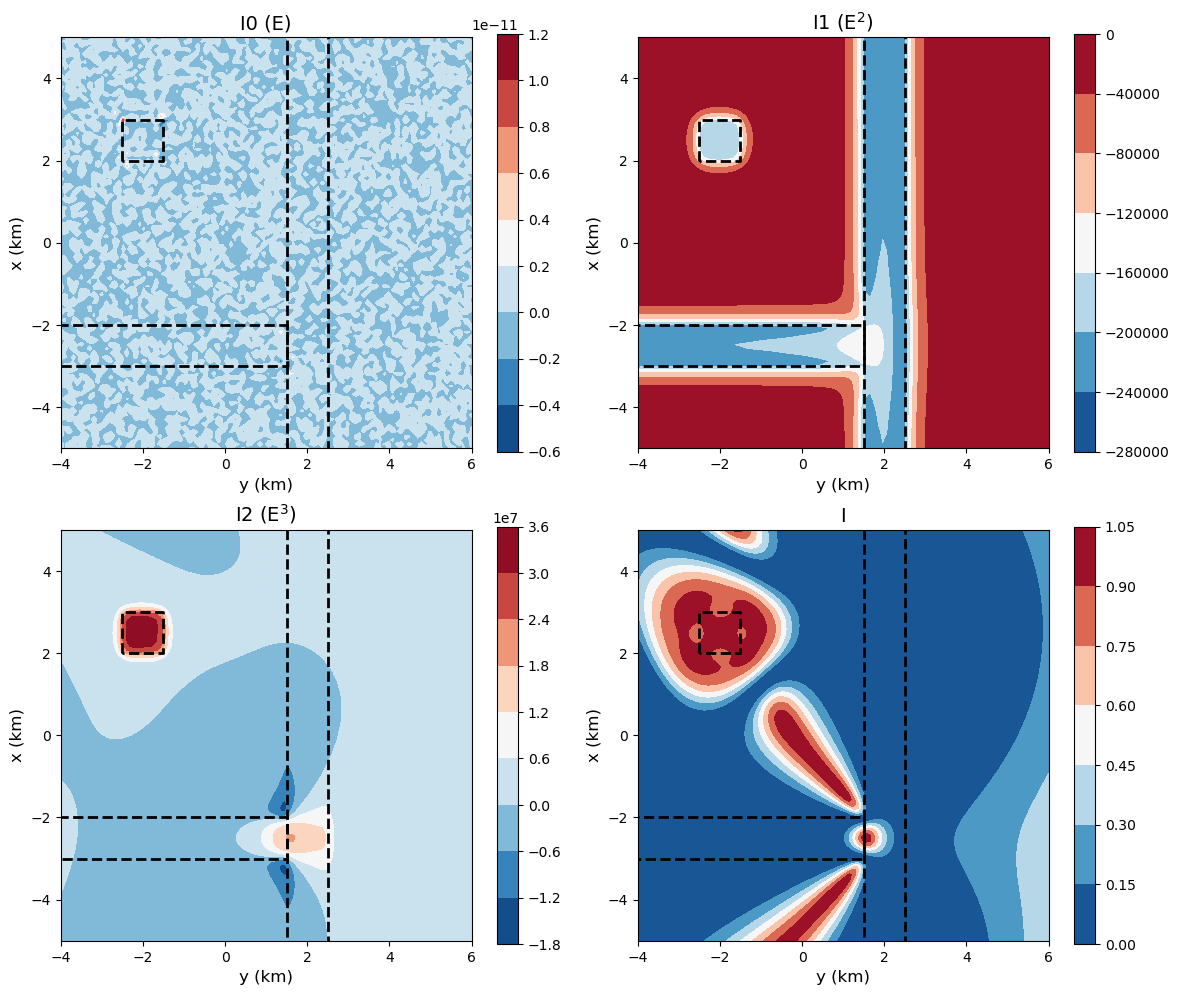

In [7]:
fields = [I0, I1, I2, I]
windows = [1, 2, 3, 4]
titles = ['I0 (E)', 'I1 (E$^{2}$)', 'I2 (E$^{3}$)', 'I']

plt.figure(figsize=(12,10))

for w, window in enumerate(windows):

    plt.subplot(2,2,window)
    plt.title(titles[w], fontsize=14)
    plt.axis('scaled')
    plt.contourf(coordinates['y'].reshape(shape)*0.001, 
                 coordinates['x'].reshape(shape)*0.001, 
                 fields[w].reshape(shape), cmap='RdBu_r')
    plt.colorbar()
    plf.model_boundaries(model, m2km=True)
    plt.ylim(0.001*area[0], 0.001*area[1])
    plt.xlim(0.001*area[2], 0.001*area[3])
    plt.ylabel('x (km)', fontsize=12)
    plt.xlabel('y (km)', fontsize=12)

plt.tight_layout()

plt.show()